## Description

This sample Jupyter notebook is designed to demonstrate how to load and display one dataset in a Jupyter notebook report using Monitor+. 
The Chart library used is Matplotlib. See the 'Imports' section below for a list of the other libraries used.

The report downloads one daily market data time series. The data is requested as business days (5 day week), filled forward. The dataset is  then converted to a Pandas data frame and charts displaying both daily and 2 moving averages are created. You can change change the datasource, symbol and frequency and all paramerters (including themoving Average values) in the 'Global Variables'section below. 

You can find your favorites datasets easily in your Monitor+ Favorites list using the 'List my Favorite Datasets' notebook or by  <a href="https://dev2.idatamedia.org/profilemain?tab=favorites"> clicking here</a> to log into your Monitor+ Favorites portal where you can view and manage your favorite datasets.  


<b>Disclaimer.</b><br>
We offer these reports for informational purposes only and are provided ‘as is’ without warranty of any kind, either express or implied, including, but not limited to, the implied warranties of fitness for a purpose, or the warranty of non-infringement.  Please refer to our <a href="https://www.sarus.com/terms-and-conditions">Terms and Conditions</a> for more information. Any links on this site are provided as a convenience and for informational purposes only; they do not constitute an endorsement or an approval by the us of any of the products, services or opinions of the corporation or organization or individual. We bear no responsibility for the accuracy, legality or content of the external site or for that of subsequent links. Contact any external sites for answers to questions regarding its content.  The market data used in the reports below may be generated sample data and as such not representative on any real or published values. Do not use any of the report values for any purpose other than to demonstrate the functionality of this report.

<b>Notice:</b> The default API key used in this report is a demonstration key and may return simulated market data and <b>not actual market data data</b>  or a limiyrd selection and range of market data.
Do not use data returned with this default API key for any use except to test the functionality of the Monitor+ API in your work environment. Subscribers should change the default API key with their own API key in order to get valid market data (see the 'Global Variables' section  below. 

If you have any questions about this report, please go to the Sarus web site (www.sarus.com)  and use the <a href="https://www.sarus.com/contact-us"> 'Contact'</a> menu to get in  touch or email support@sarus.com


## Imports

In [2]:
#  IData is the Monitor+ API class
from monitorplus import IData 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

## Global Variables

In [3]:
# Customers API Key needed to request for data from the Monitor+ API
# To get updated values, change this API key to your own key.
# The key below may retuen test data only and not actual market values.  
API_KEY = "T0IX4-FYNK5-VJ7P2-LGECS"

# define colours used (see  https://i.stack.imgur.com/9UVnC.png)
BOLD = '\033[01m'
RESET = '\033[0m'
BLACK_FG = '\033[30m'
GREEN_FG = '\033[32m'
WHITE_FG = '\033[37m'

RED_BG = '\033[101m'
#  hmmm  '\033[47m' and '\033[107m' not working
WHITE_BG = ''

# ANSI code Combinations used in labels
WARNING_LABEL =  WHITE_FG + RED_BG
SUCCESS_LABEL=  GREEN_FG + WHITE_BG
NORMAL_LABEL =BLACK_FG + WHITE_BG

print ( SUCCESS_LABEL+ " The Daily API command was run successfully. \n")

#  number of rows to list in the  table outouts
Data_Rows=31

#  The full API documentation for getting the data is at:   
#       https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc

# Sample Dataset #1 to use in the Notebook
API_Datasource1 = "ECBFX"
API_DSSymbol1 = "EURJPY"
# the Name below  will be filled from the API if the request is successful
API_DSName1 = ""


# The earliest date to request from the API
API_StartDate = "2010-01-01"


# Weekends can be added or removed by setting the value to "7"  or "5"
# "5" means only weekdays (no weekends) are returned. 
# Refer to th API documentation for many more options
API_WeekType = "5"

# The 2 moving  average values to  use
MovAvg1=7
MovAvg2=14


#  Fill the daily data before (prefill happens before calculating monthly averages)
API_Prefill=True

# API_PrefillType can be "previous",  "midpoint" or "interpolate"
API_PrefillType = "interpolate"


# We can choose to load and chart non-daily data. 
# Valid Frequencies are: 
#  w, hm, m, q, hy  y  ( where'hm' is half-month and 'hy' is half-year).
# Check the API documentation "Frequency Parameter" and "Frequency Options" sections for examples of custom frequencies and weekend handling.
#      https://www.sarus.com/api-docs#getdatasetvaluesrc

# Used in API to request daily or average data
DataFreq = "d"
# Appears in chart  legends
DataFreqDesc = "Daily"




 The Daily API command was run successfully. 



## API - Return market data  for one dataset

The full list of the parameters used in the API request to get market data can be <a href="https://www.sarus.com/api-docs#getdatasetvaluesrc">viewed here</a>


In [4]:
# initialise the Python class
idata = IData()
# turn off comments from  Monitor+
idata.set_verbose(False)

RC_DayResult =  None

#Store the API Key in the Python Class
idata.set_api_key(API_KEY)

# We will return the metadata for the user favorite datasets
# Now request historical prices for two datasets in RC ( row x column) format.
RC_DayResult = idata.get_dataset_values_rc(
    Series=[
        # You can change the datasources and symbols in the Global Variable section above
        # For HandleWeekend parameters - see HandleWeekends section at the  "Viewed Here"  link above. 5a = 5 day adjusted.
        {"Datasource": API_Datasource1,"Symbol": API_DSSymbol1, "HandleWeekends":API_WeekType,"Fill":True }
    ],
    # Additional API parameters
    StartDate = API_StartDate,
    Frequency = DataFreq,
    Prefill = API_Prefill,
    # For missing valuess are filled
    FillOptions = {"Type": API_PrefillType},
     )
    
if (RC_DayResult is None):
       print (WARNING_LABEL +'\n The RC_Result API call returned an error. \n' + RESET)
else:
    print ( SUCCESS_LABEL+ " The Daily API command was run successfully. \n"+RESET)



 The Daily API command was run successfully. 



# Display daily data in a table.

In [6]:
#Access the Monitor+ utility file that helps us to process the report data.
from IPython.display import display

API_DSName1Day = ""

# Check we have data from the 'API Initialisation' section above using its RC_Result variable
if (RC_DayResult is None):
    print (WARNING_LABEL +'\nThe  API request for market data failed. Please check the "API Initialisation" section above.' + RESET)   
else:
    # Extract the names for the datasets.  We can use them later to check if the extract was successful.
    API_DSName1Day = RC_DayResult["Columns"][0]['Name']
    
    #  Check datasets are loaded OK
    if API_DSName1Day > "":
        rows = RC_DayResult['Rows']
        corrections = RC_DayResult['Corrections']
        df = pd.DataFrame(rows.values(), columns=[API_DSName1Day], index=rows.keys())
        df = df.reset_index()
        df.rename(columns={'index': 'Date'}, inplace=True)
        df.dropna(axis=0, inplace=True)
        df["Date"] = pd.to_datetime(df['Date'])
        df.insert(1, 'Year', df.Date.dt.year)
        df.insert(2, 'Month', df.Date.dt.month)
        # show the latest elements in a table - rows defined in global Data_Rows variable
        print(SUCCESS_LABEL +"\nThe latest "+str(Data_Rows)+" daily data rows:\n"+RESET)
  
        display(df.tail(Data_Rows))
        
        # The methods we use require our data to be a Time-Series. 
        df["Date"] = pd.to_datetime(df["Date"])
        df.set_index("Date", inplace=True)   
    else:
        print(WARNING_LABEL + '\n No dataset was returned from the Monitor+ API. ' + RESET)

        
       


The latest 31 daily data rows:



,Date,Year,Month,ECB - Euro vs Japanese Yen
3121,2021-12-20,2021,12,128.195811
3122,2021-12-21,2021,12,128.657776
3123,2021-12-22,2021,12,129.269524
3124,2021-12-23,2021,12,129.630368
3125,2021-12-24,2021,12,129.741406
3126,2021-12-27,2021,12,130.084587
3127,2021-12-28,2021,12,129.855048
3128,2021-12-29,2021,12,130.580515
3129,2021-12-30,2021,12,130.299018
3130,2021-12-31,2021,12,130.894580


# Creating the Moving Average Charts.

Plotting the API datasets in charts.

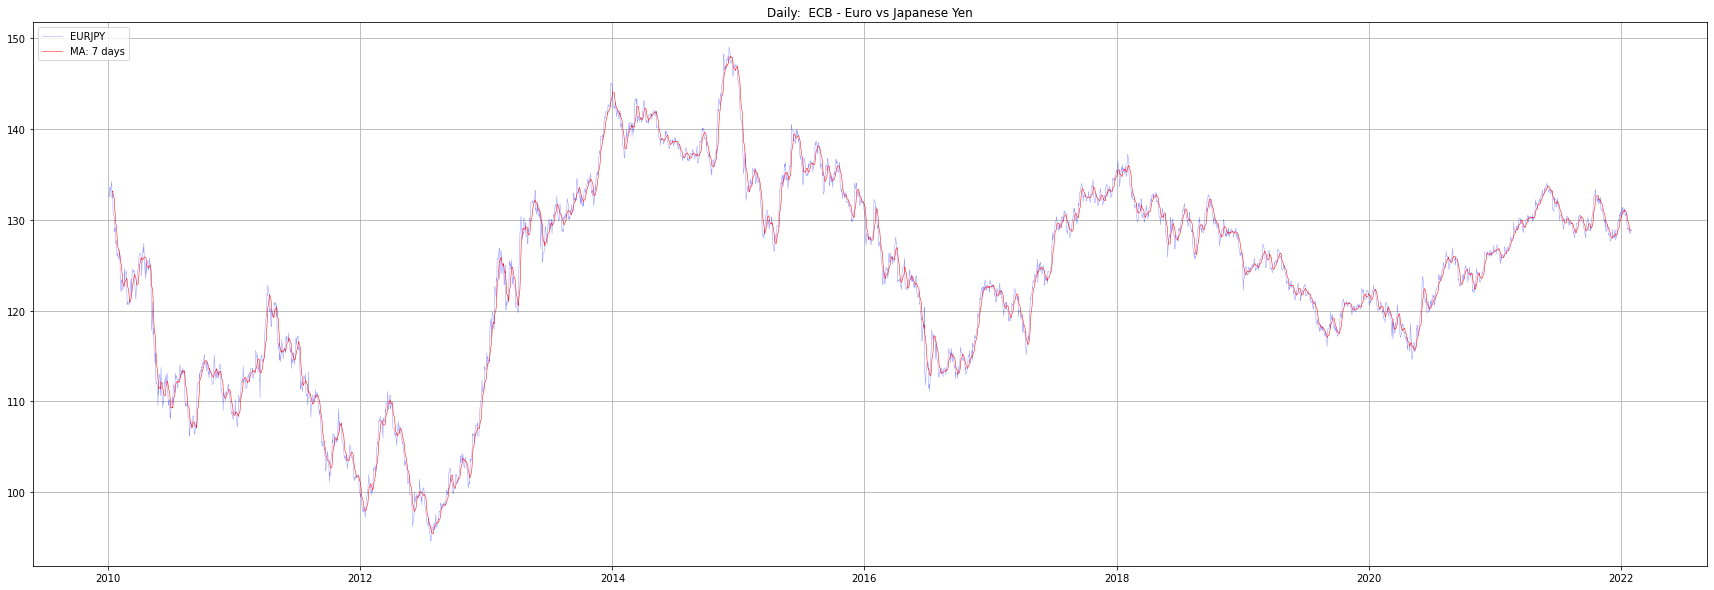

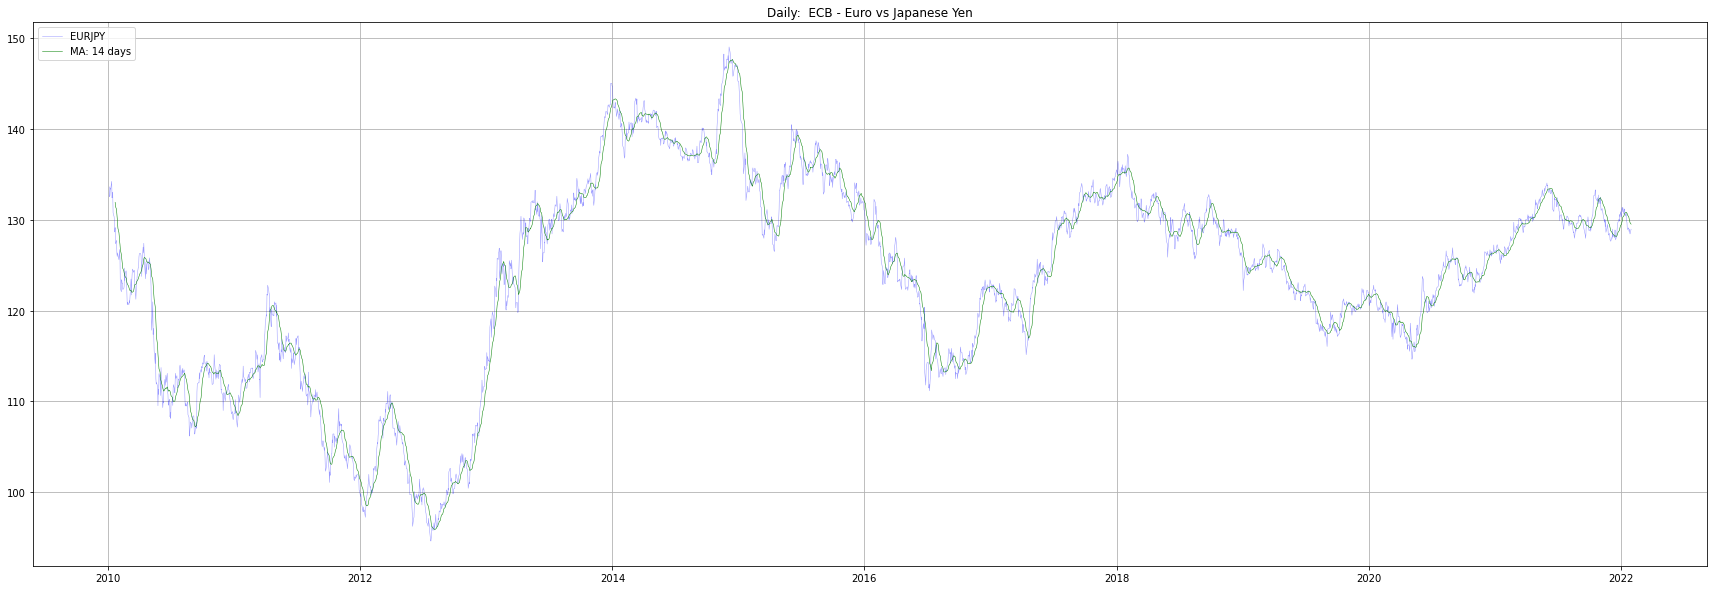

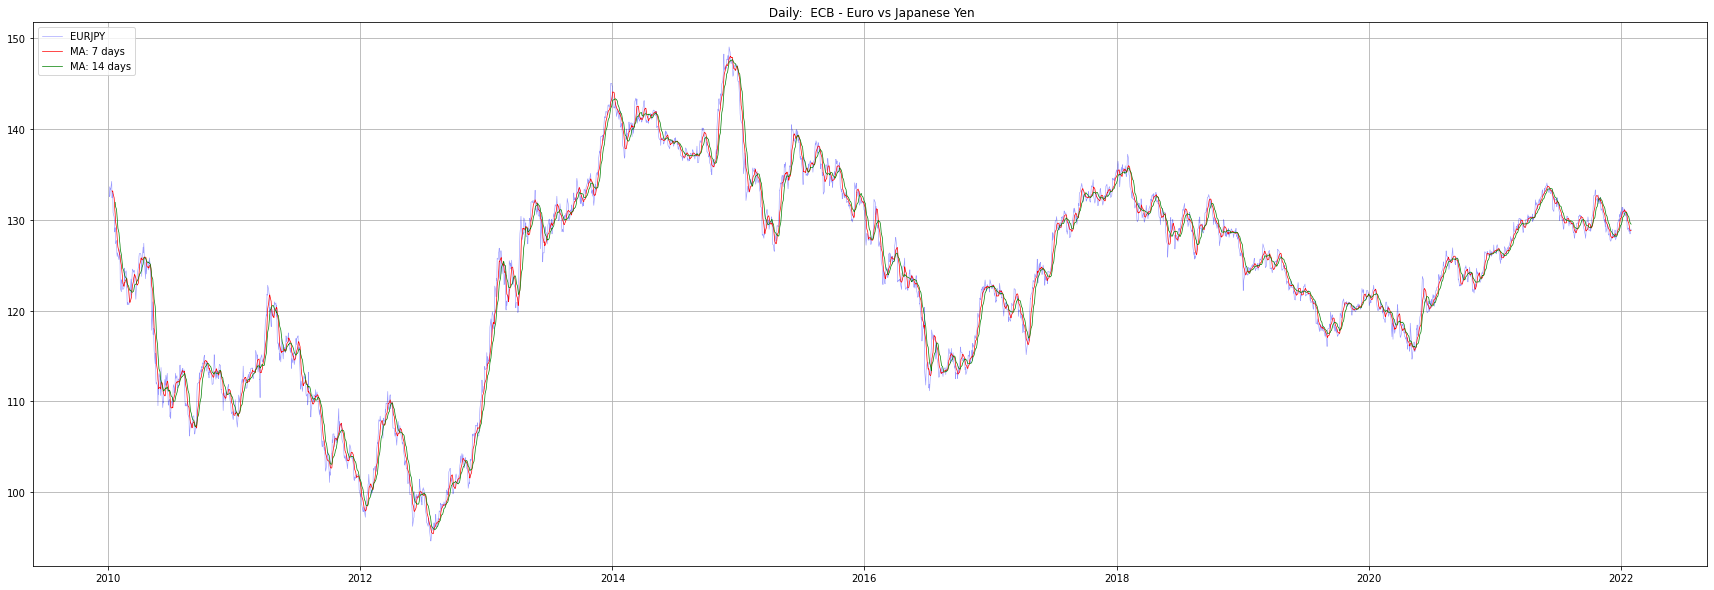

In [7]:
#  Check datasets are loaded in case code is run out of sequence
if API_DSName1Day > "":
    df['SMA_'+str(MovAvg1)] = df.iloc[:,2].rolling(window=MovAvg1).mean()
    df['SMA_'+str(MovAvg2)] = df.iloc[:,2].rolling(window=MovAvg2).mean()

    f, (ax1)=plt.subplots(1, 1, figsize=[30,10])
    ax1.plot(df[API_DSName1Day], color = 'blue',  linewidth=.5,  label=API_DSSymbol1, alpha=0.4)
    ax1.plot(df['SMA_7'],label='MA: 7 days',linewidth=.5, color = 'red')
    ax1.title.set_text(f"{DataFreqDesc}:  {API_DSName1Day}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    plt.show()    
    
    
    
    f, (ax1)=plt.subplots(1, 1, figsize=[30,10])
    ax1.plot(df[API_DSName1Day], color = 'blue',  linewidth=.5,  label=API_DSSymbol1, alpha=0.4)
    ax1.plot(df['SMA_14'],label='MA: 14 days',linewidth=.5, color='green')
    ax1.title.set_text(f"{DataFreqDesc}:  {API_DSName1Day}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    plt.show()   
    
    
    f, (ax1)=plt.subplots(1, 1, figsize=[30,10])
    ax1.plot(df[API_DSName1Day], color = 'blue',  linewidth=.6,  label=API_DSSymbol1, alpha=0.4)
    ax1.plot(df['SMA_7'],label='MA: 7 days',linewidth=.7, color='red')
    ax1.plot(df['SMA_14'],label='MA: 14 days',linewidth=.7,color='green')
    ax1.title.set_text(f" {DataFreqDesc}:  {API_DSName1Day}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    plt.show()   
    

else:
    print(WARNING_LABEL + '\n\n Daily Chart: No dataset was loaded from the API for series number 2. ' + RESET)

